# Dataloader example

This tutorial is adopted from [Python-Engineer's Pytorch Tutorial](https://github.com/python-engineer/pytorchTutorial)

In [1]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np

Gradient computations might be expensive on the entire data-set implement mini-batch gradient descent. 
- Divide dataset in small batch
```python
#Training loop
for epoch in range(num_epochs):
    #loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
```

- epoch = one forward and backward pass of ALL training samples
- batch_size = number of training samples used in one forward/backward pass
- number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes

>e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

In [2]:
# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class WineDataset(Dataset):
    def __init__(self,wine_data_path):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt(wine_data_path, delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]
        
        #First column is class-label
        self.x_data = torch.from_numpy(xy[:,1:]) # size [n_samples, n_features] 
        self.y_data = torch.from_numpy(xy[:,[0]]) # size [n_samples, 1]
    
    #Routine to get index for the i-th sample 
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    #Routine to return size of the dataset 
    def __len__(self):
        return self.n_samples

In [3]:
wine_data_path = 'data/wine/wine.csv'

#Create dataset 
dataset = WineDataset(wine_data_path)

In [4]:
# get first sample and unpack
first_data = dataset[0]
print(first_data)

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]), tensor([1.]))


In [5]:
features, labels = first_data #__getitem__ function helps in parsing this
print('Features: {}\n'.format(features))
print('Label: {}'.format(labels))

Features: tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])

Label: tensor([1.])


In [6]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
train_loader = DataLoader(dataset=dataset, #dataset as instantiated above
                          batch_size=4, #Num of examples in an batch 
                          shuffle=True, #If they should be shuffled before batching
                          num_workers=2) #Faster loading by using multiprocessors

In [7]:
# convert to an iterator and look @ 1 random sample 
dataiter = iter(train_loader)
data = dataiter.next()
features, labels = data
print(features, labels)
print(features.shape, labels.shape)

tensor([[1.2070e+01, 2.1600e+00, 2.1700e+00, 2.1000e+01, 8.5000e+01, 2.6000e+00,
         2.6500e+00, 3.7000e-01, 1.3500e+00, 2.7600e+00, 8.6000e-01, 3.2800e+00,
         3.7800e+02],
        [1.1030e+01, 1.5100e+00, 2.2000e+00, 2.1500e+01, 8.5000e+01, 2.4600e+00,
         2.1700e+00, 5.2000e-01, 2.0100e+00, 1.9000e+00, 1.7100e+00, 2.8700e+00,
         4.0700e+02],
        [1.2820e+01, 3.3700e+00, 2.3000e+00, 1.9500e+01, 8.8000e+01, 1.4800e+00,
         6.6000e-01, 4.0000e-01, 9.7000e-01, 1.0260e+01, 7.2000e-01, 1.7500e+00,
         6.8500e+02],
        [1.3170e+01, 5.1900e+00, 2.3200e+00, 2.2000e+01, 9.3000e+01, 1.7400e+00,
         6.3000e-01, 6.1000e-01, 1.5500e+00, 7.9000e+00, 6.0000e-01, 1.4800e+00,
         7.2500e+02]]) tensor([[2.],
        [2.],
        [3.],
        [3.]])
torch.Size([4, 13]) torch.Size([4, 1])


In [8]:
# Dummy training loop 
num_epochs = 2
total_samples = len(dataset)
n_iterations = np.ceil(total_samples/train_loader.batch_size)

# here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations in 1 epoch
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader): #Output is same as that of __getitem__
        if (i+1)%5 == 0: 
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

Epoch: 1/2, Step 5/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 10/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 15/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 25/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 35/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 45/45.0| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Step 5/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 15/45.0| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 20/45.0| Inpu

torch.Size([3, 1, 28, 28]) torch.Size([3])
torch.Size([28, 28])


(-0.5, 27.5, 27.5, -0.5)

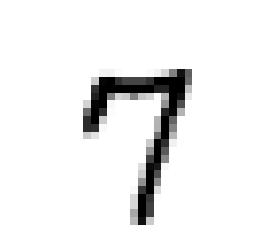

In [13]:
# some famous datasets are available in torchvision.datasets
# e.g. MNIST, Fashion-MNIST, CIFAR10, COCO
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

train_dataset = torchvision.datasets.MNIST(root='data/',
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

train_loader = DataLoader(dataset=train_dataset,
                                           batch_size=3,
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)
random_digit_image=inputs[0][0]
plt.imshow(random_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")